In [1]:
import os
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [37]:
look_back = 1
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i + look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)

In [38]:
# file loader
sydtpath = "C:/python/project_graduate/data/mireaAsset/"
naturalEndoTekCode = "sam.csv"
fullpath = sydtpath + naturalEndoTekCode

pandf = pd.read_csv(fullpath, engine='python' ,index_col="날짜" )
pandf.head()

,종목명,시가,고가,저가,종가,거래량,거래금액
날짜,,,,,,,
20100104,삼성전자,16060,16180,16000,16180,239271,192566991
20100105,삼성전자,16520,16580,16300,16440,559219,460329740
20100106,삼성전자,16580,16820,16520,16820,459755,383612842
20100107,삼성전자,16820,16820,16260,16260,443237,366099465
20100108,삼성전자,16400,16420,16120,16420,295798,241586108


In [39]:
# convert nparray
nparr = pandf['종가'].values[::]
nparr.astype('float64')
print(nparr)
print(len(nparr))
nparr = nparr.reshape(-1,1)

[16180 16440 16820 ..., 47950 46800 46650]
2091


In [40]:
# normalization
scaler = MinMaxScaler(feature_range=(0, 1))
nptf = scaler.fit_transform(nparr)

C:\python\Anaconda3\envs\deeplearning\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [41]:
# split train, test
train_size = int(len(nptf) * 0.9)
test_size = len(nptf) - train_size
train, test = nptf[0:train_size], nptf[train_size:len(nptf)]
print(len(train), len(test))

1881 210


In [42]:
# create dataset for learning
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [43]:
# simple lstm network learning
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(10, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=5, batch_size=1, verbose=2)

Epoch 1/5
 - 17s - loss: 0.0071
Epoch 2/5
 - 18s - loss: 1.4024e-04
Epoch 3/5
 - 18s - loss: 1.4805e-04
Epoch 4/5
 - 16s - loss: 1.6512e-04
Epoch 5/5
 - 15s - loss: 1.6655e-04


In [44]:
# make prediction
testPredict = model.predict(testX)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print('Train Score: %.2f RMSE' % testScore)

Train Score: 917.62 RMSE


In [45]:
# predict last value (or tomorrow?)
lastX = nptf[-1]
lastX = np.reshape(lastX, (1, 1, 1))
lastY = model.predict(lastX)
lastY = scaler.inverse_transform(lastY)
print('Predict the Close value of final day: %d' % lastY)  # 데이터 입력 마지막 다음날 종가 예측

Predict the Close value of final day: 47174


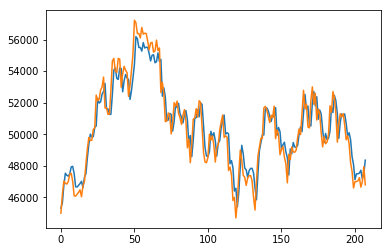

In [46]:
# plot
plt.plot(testPredict)
plt.plot(testY)
plt.show()